YOLO로 사람 인식하고 그 사람의 얼굴 인식하기

In [5]:
!pip install ultralytics
!pip install torch opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 41.9 MB/s eta 0:00:00


# **1-1. YOLO 모델 로드**

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch
import time

# 디바이스 설정 (GPU 또는 CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# YOLOv8 모델 로드 및 디바이스 설정
model = YOLO("yolov8n.pt").to(device)

# 학습은 추가로 하면 됨


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 42.1MB/s]


# **1-2. YOLO 학습**

In [8]:
# zip 파일 업로드

from google.colab import files
import zipfile
import os

# 데이터셋 업로드
uploaded = files.upload()


Saving gun detection.v1i.yolov8-obb.zip to gun detection.v1i.yolov8-obb.zip


In [9]:
# 압축 풀기

# 압축 해제
zip_filename1 = "gun detection.v1i.yolov8-obb.zip"  # 업로드한 파일 이름으로 변경
dataset_path1 = "/content/gun detection.v1i.yolov8-obb"
with zipfile.ZipFile(zip_filename1, 'r') as zip_ref:
    zip_ref.extractall(dataset_path1)

# 압축 해제된 데이터 경로 확인
print(f"Dataset extracted to: {dataset_path1}")
os.listdir(dataset_path1)

Dataset extracted to: /content/gun detection.v1i.yolov8-obb


['valid', 'README.roboflow.txt', 'README.dataset.txt', 'train', 'data.yaml']

In [10]:
# 모델 훈련
model.train(
    data='/content/gun detection.v1i.yolov8-obb/data.yaml',  # 데이터 설정 파일 경로
    epochs=4,                          # 훈련 에폭 수
    batch=16,                           # 배치 크기
    imgsz=640                           # 이미지 크기
)

print(type(model.names), len(model.names))

print(model.names)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gun detection.v1i.yolov8-obb/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, opt

100%|██████████| 755k/755k [00:00<00:00, 7.13MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 280MB/s]


AMP: checks passed ✅


train: Scanning /content/gun detection.v1i.yolov8-obb/train/labels... 1743 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1743/1743 [00:00<00:00, 1923.22it/s]


train: New cache created: /content/gun detection.v1i.yolov8-obb/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/gun detection.v1i.yolov8-obb/valid/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 914.84it/s]

val: New cache created: /content/gun detection.v1i.yolov8-obb/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 4 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/4      2.33G      1.154      2.106      1.437         80        640: 100%|██████████| 109/109 [00:43<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         18         43      0.895      0.453      0.611      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/4      2.19G      1.149       1.63      1.434         74        640: 100%|██████████| 109/109 [00:37<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         18         43      0.496      0.642      0.636      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/4      2.26G      1.127      1.501      1.419         73        640: 100%|██████████| 109/109 [00:40<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         18         43      0.708      0.648      0.722      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/4      2.19G      1.048      1.361       1.36         76        640: 100%|██████████| 109/109 [00:37<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         18         43      0.949      0.698      0.849      0.569



4 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         18         43      0.951      0.698      0.849      0.569
                 Knife         18         18      0.962      0.556       0.75      0.366
                Person         15         25      0.939       0.84      0.947      0.771
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train
<class 'dict'> 3
{0: 'Knife', 1: 'Person', 2: 'Pistol'}


# **2. ArcFace 모델 로드**

In [45]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


In [ ]:
!pip install opencv-python-headless==4.8.0.74
!pip install onnxruntime-gpu

!pip install insightface opencv-python-headless

  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Reason for being yanked: deprecated, use 4.8.0.76
Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.74 which is incompatible.
albucore 0.0.19 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.74 which is incompatible.


ERROR: Operation cancelled by user
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (50.0 MB)


In [1]:
from insightface.app import FaceAnalysis

# ArcFace 모델 초기화
app = FaceAnalysis()
app.prepare(ctx_id=0)  # GPU 사용 시 ctx_id=0, CPU 사용 시 ctx_id=-1


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


# **3. 웹캠 이미지 캡처**

In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

import matplotlib.pyplot as plt
import torch
import time


# 웹캠 이미지 캡처 함수

def take_photo():
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const video = document.createElement('video');
            const button = document.createElement('button');
            button.textContent = 'Capture';
            div.appendChild(video);
            div.appendChild(button);
            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            await new Promise((resolve) => button.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg');
        }
        takePhoto();
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = b64decode(data.split(',')[1])
    np_arr = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
    return img


# **4. 얼굴 임베딩 생성 함수**

In [3]:
# 얼굴 임베딩 생성 함수
def get_face_embedding(image):
    faces = app.get(image)  # 얼굴 탐지 및 임베딩 생성
    if len(faces) > 0:
        return faces[0].embedding  # 첫 번째 얼굴 임베딩 반환
    else:
        print("No face detected.")
        return None


# **5. 내 얼굴 임베딩 등록**

In [4]:
registered_faces = {}
# 자신의 얼굴 등록
print("Capture your face to register:")
my_face_image = take_photo()
my_face_image_rgb = cv2.cvtColor(my_face_image, cv2.COLOR_BGR2RGB)
my_face_embedding = get_face_embedding(my_face_image_rgb)

if my_face_embedding is not None:
    name=input("Enter your name: ")
    registered_faces[name]=my_face_embedding
    print("Successfully registered your face.")
else:
    print("Failed to register your face. Try again.")


Capture your face to register:


<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


Enter your name: rk
Successfully registered your face.


# **6. 얼굴 비교 함수**

In [5]:
from sklearn.metrics.pairwise import cosine_similarity


In [6]:
# 얼굴 비교 함수
def is_registered_face(face_embedding, registered_embeddings, threshold=0.5):
    for name, embedding in registered_embeddings.items():
        similarity = cosine_similarity([face_embedding], [embedding])[0][0]
        if similarity > threshold:
            return name, similarity
    return "Unknown", 0.0



# **7. YOLO와 ArcFace 통합**

In [15]:
# YOLO + ArcFace 통합 함수
def process_image(image, registered_faces, threshold=0.5):
    # YOLO로 사람 탐지

    from ultralytics import YOLO

  # YOLO 모델 로드
    model = YOLO("runs/detect/train/weights/best.pt").to("cuda" if torch.cuda.is_available() else "cpu")  # GPU 또는 CPU 사용


    results = model.predict(image, imgsz=640)
    people_boxes = []
    gun_boxes = []
    knife_boxes = []

    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        class_id = int(box.cls)  # 클래스 ID
        confidence = float(box.conf)  # 신뢰도

        # 클래스 ID가 사람(class_id=0)인 경우
        if class_id == 1 and confidence > 0.5:
            people_boxes.append((x1, y1, x2, y2))
        elif class_id==0 and confidence>0.2:
            gun_boxes.append((x1, y1, x2, y2))
        elif class_id==2 and confidence>0.2:
            knife_boxes.append((x1, y1, x2, y2))

    # ArcFace로 얼굴 분석
    for (x1, y1, x2, y2) in people_boxes:
        person_image = image[y1:y2, x1:x2]  # 사람 영역 자르기
        face_embedding = get_face_embedding(person_image)

        if face_embedding is not None:
            name, similarity = is_registered_face(face_embedding, registered_faces, threshold)

            fx1, fy1, fx2, fy2 = max(x1, x1 + 10), max(y1, y1 + 10), min(x2, x2 - 10), min(y2, y2 - 10)

             # 시각화 - 사람 Bounding Box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # 빨간색 박스: 사람 전체
            label_person = "Person"
            cv2.putText(image, label_person, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

            # 시각화 - 얼굴 Bounding Box
            cv2.rectangle(image, (fx1, fy1), (fx2, fy2), (0, 255, 0), 2)  # 초록색 박스: 얼굴
            label_face = f"{name} ({similarity:.2f})"
            cv2.putText(image, label_face, (fx1, fy1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


    # 총기 바운딩 박스 (파란색)
    for (x1, y1, x2, y2) in gun_boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        label_gun = "Gun"
        cv2.putText(image, label_gun, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 칼 바운딩 박스 (노란색)
    for (x1, y1, x2, y2) in knife_boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 255), 2)
        label_knife = "Knife"
        cv2.putText(image, label_knife, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)




    return image


Capture an image to process:


<IPython.core.display.Javascript object>


0: 480x640 1 Person, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


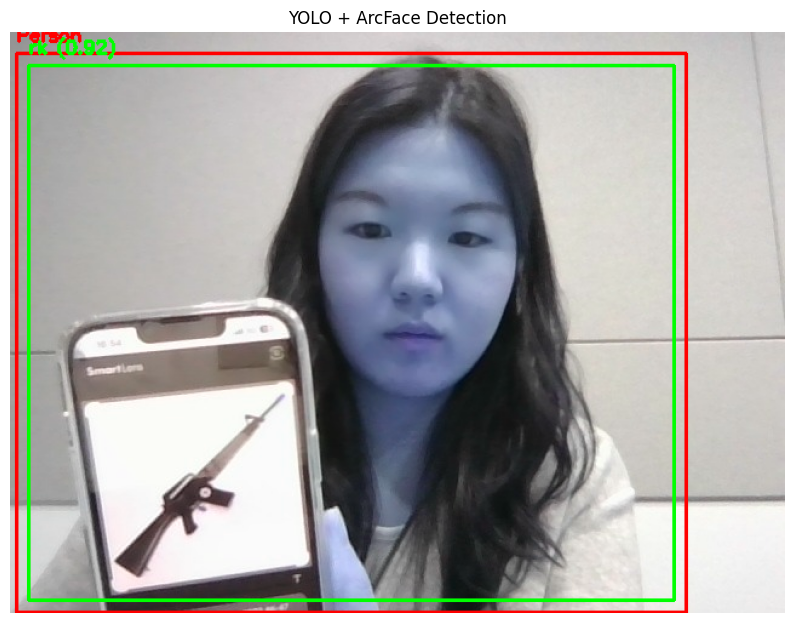

In [16]:
# 실시간 YOLO + ArcFace 처리
print("Capture an image to process:")
input_image = take_photo()  # 웹캠으로 이미지 캡처
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# YOLO와 ArcFace 통합 처리
output_image = process_image(input_image_rgb, registered_faces, threshold=0.5)

# 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLO + ArcFace Detection")
plt.show()
